## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("sales_data.csv", encoding_errors = 'ignore')
def basis_data_stas(data):
    print("The number of features in data are: ", data.shape[1])
    print(" ")
    print("The number of records in data are: ", data.shape[0])
    print(" ")
    print("Data basic information: ", data.info())
    print(" ")
    print("Data description: ", data.describe())
    print(" ")
    print("The columns in data are: ", data.columns)
    print(" ")
    print("The datatypes are: ", data.dtypes)
    print(" ")
    print("The null count check: ",data.isnull().sum())

In [3]:
data.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [4]:
data.tail(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [5]:
def filling_null_data(data):
    categorical_cols, numerical_cols = [], []
    for col in data.columns:
        if data[col].dtypes == 'object':
            print("The {} is categorical data".format(col))
            categorical_cols.append(col)
        else:
            print("The {} is numerical data".format(col))
            numerical_cols.append(col)
        print("categorical cols are:", categorical_cols)
        print("numerical cols are:", numerical_cols)
    for col in categorical_cols:
        if data[col].isna().sum() != 0:
            print("The col {} has null data".format(col))
            data[col].fillna(data[col].mode()[0], inplace = True)
            print("The null data has been successfully imputed for the column {}".format(col))
    for col in numerical_cols:
        if data[col].isna().sum() != 0:
            print("The {} column has null data".format(col))
            data[col].fillna(data[col].mean(), inplace=True)
            print("The null data has been successfully imputed for the column {}".format(col))
    return categorical_cols , numerical_cols

In [6]:
categorical_cols , numerical_cols = filling_null_data(data)

The ORDERNUMBER is numerical data
categorical cols are: []
numerical cols are: ['ORDERNUMBER']
The QUANTITYORDERED is numerical data
categorical cols are: []
numerical cols are: ['ORDERNUMBER', 'QUANTITYORDERED']
The PRICEEACH is numerical data
categorical cols are: []
numerical cols are: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH']
The ORDERLINENUMBER is numerical data
categorical cols are: []
numerical cols are: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER']
The SALES is numerical data
categorical cols are: []
numerical cols are: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES']
The ORDERDATE is categorical data
categorical cols are: ['ORDERDATE']
numerical cols are: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES']
The STATUS is categorical data
categorical cols are: ['ORDERDATE', 'STATUS']
numerical cols are: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES']
The QTR_ID is numerical 

In [7]:
data.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [8]:
print("Categorical_cols are : ", categorical_cols)
print("numerical_cols are : ", numerical_cols)

Categorical_cols are :  ['ORDERDATE', 'STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
numerical_cols are :  ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP']


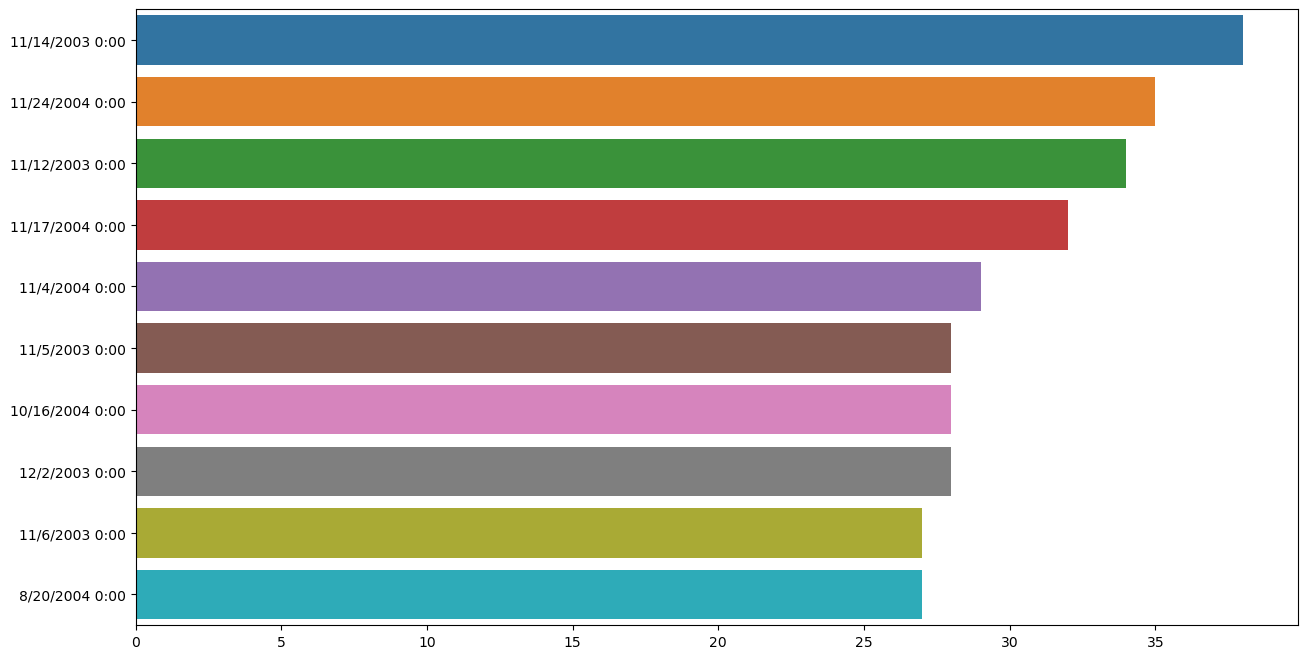

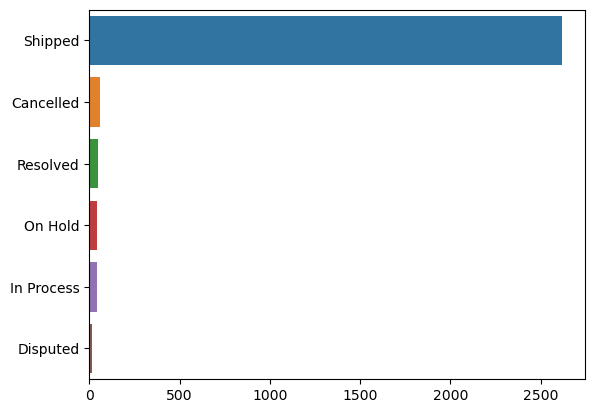

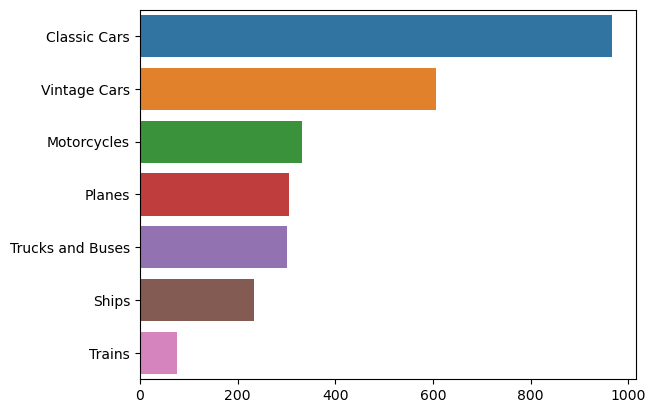

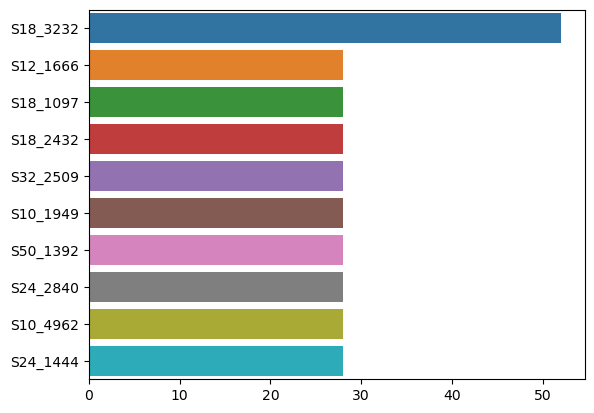

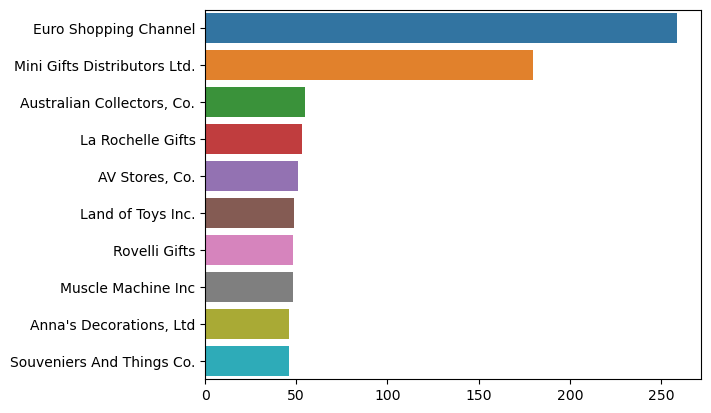

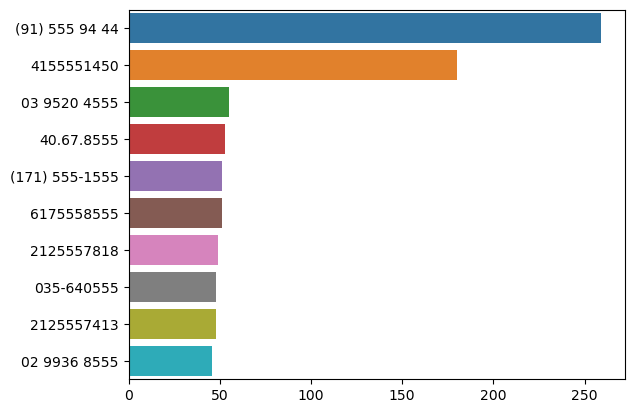

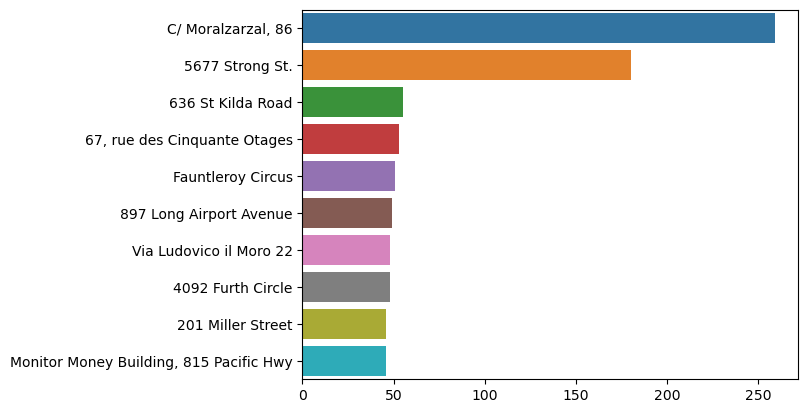

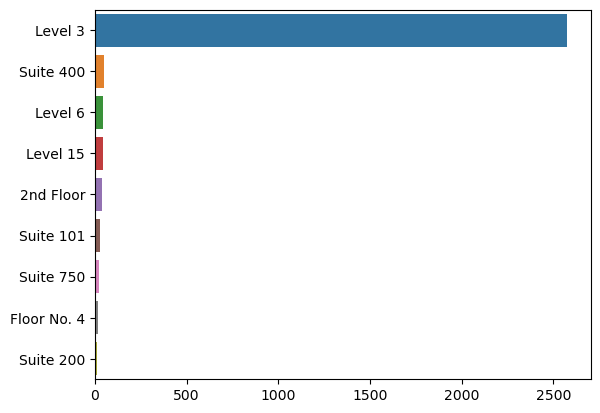

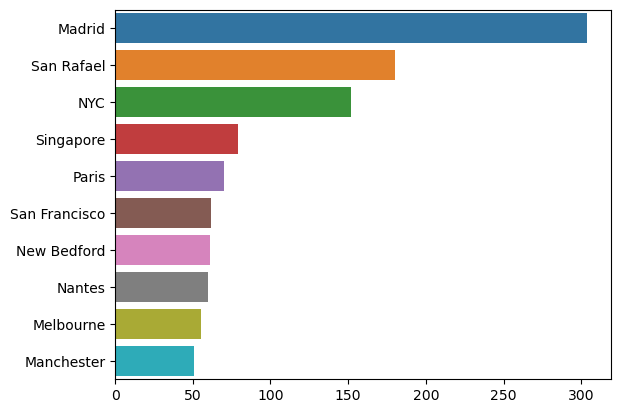

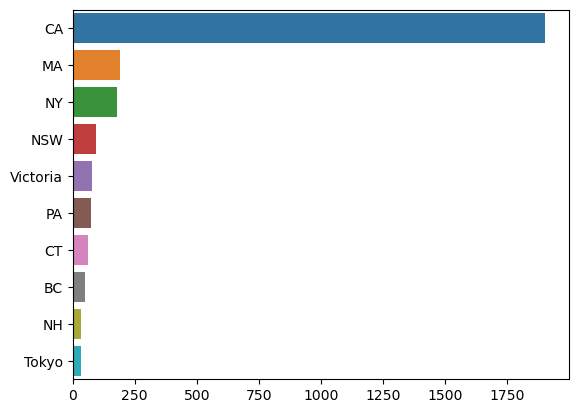

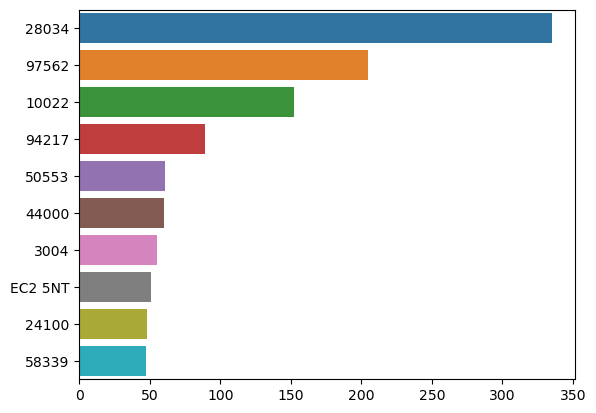

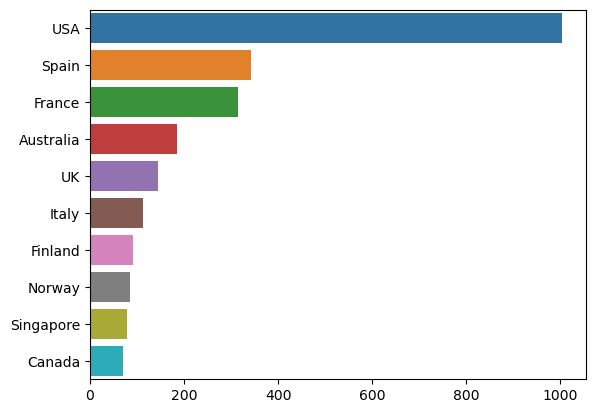

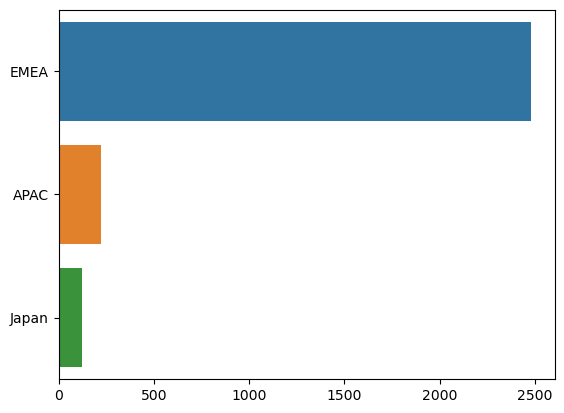

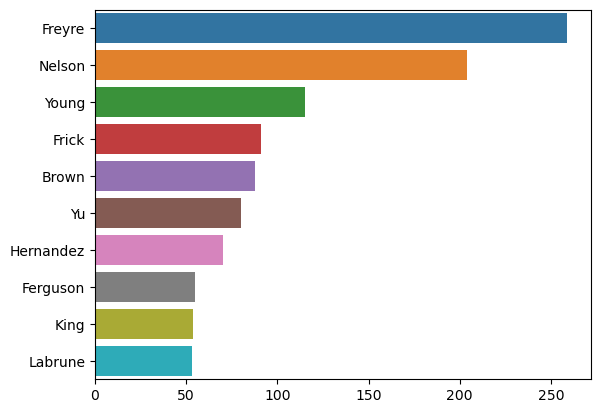

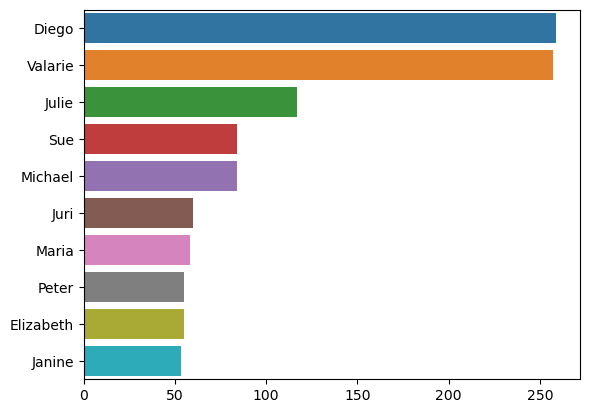

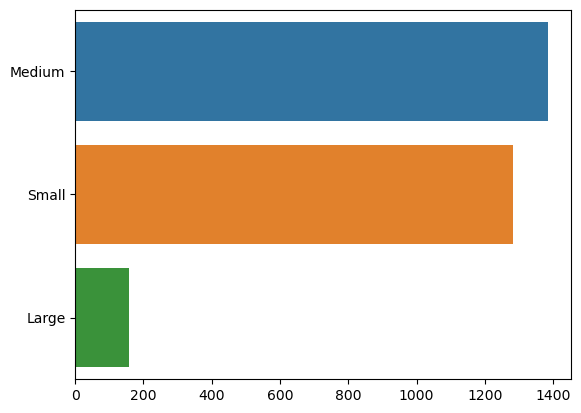

In [9]:
plt.figure(figsize = [15,8])
for col in categorical_cols:
    col_idx = data[col].value_counts().sort_values(ascending = False).head(10).index
    col_vals = data[col].value_counts().sort_values(ascending = False).head(10).values
    sns.barplot(data = data, y= col_idx, x = col_vals)
    plt.show();

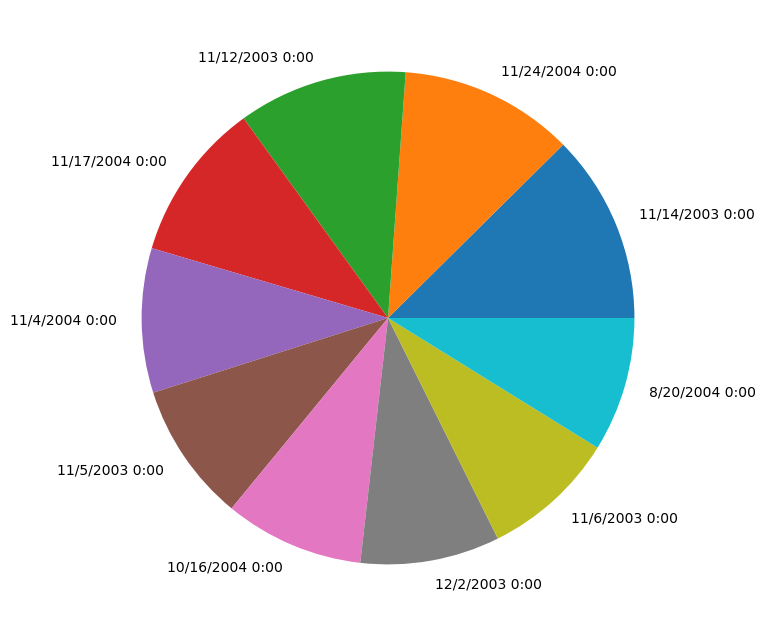

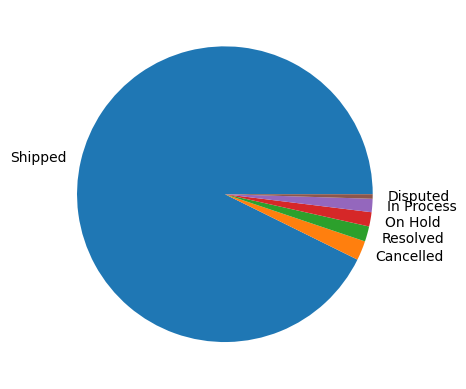

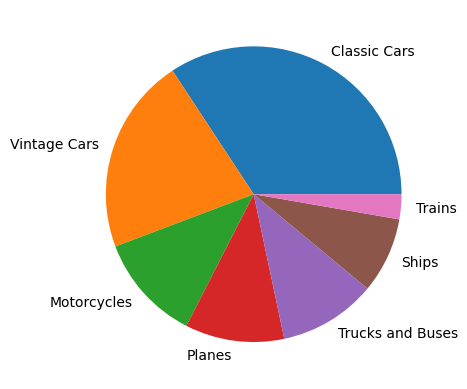

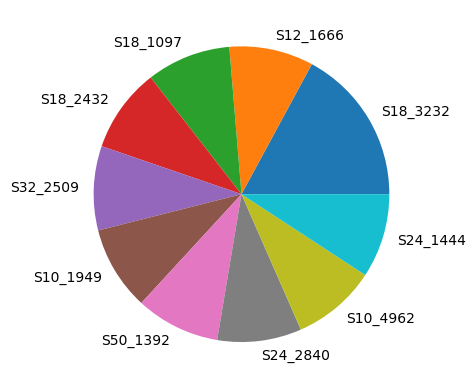

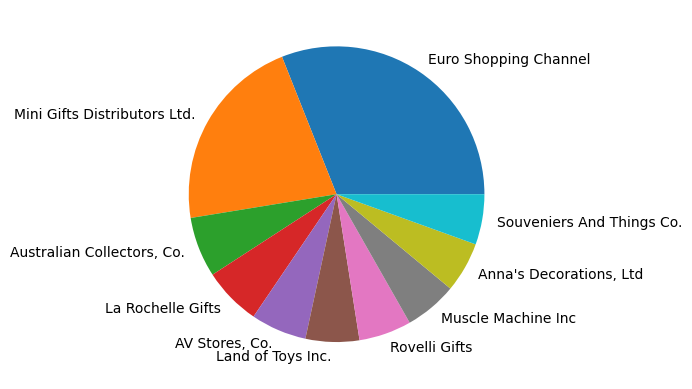

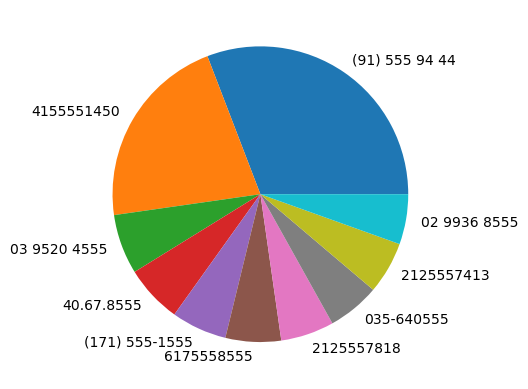

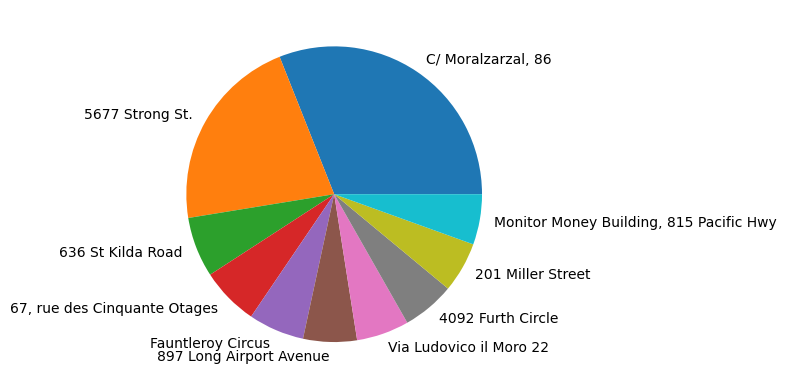

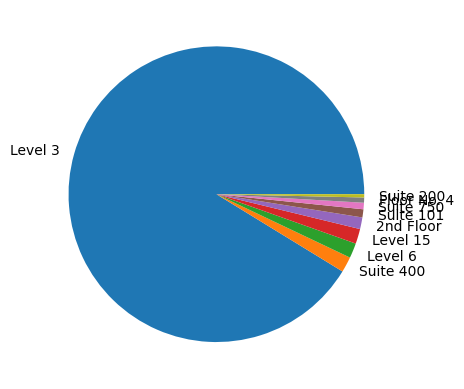

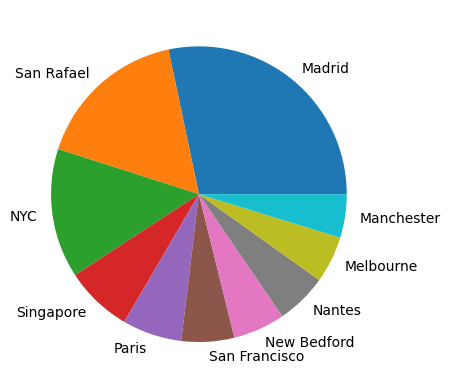

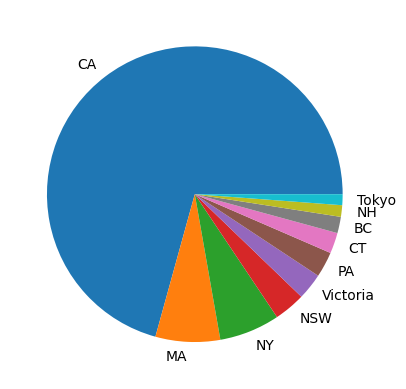

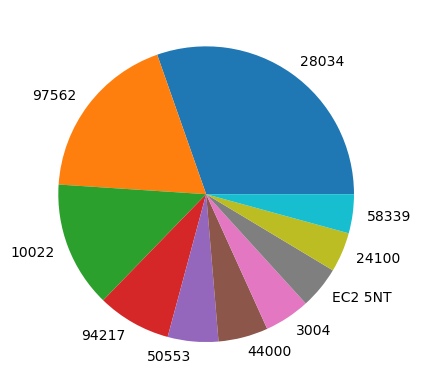

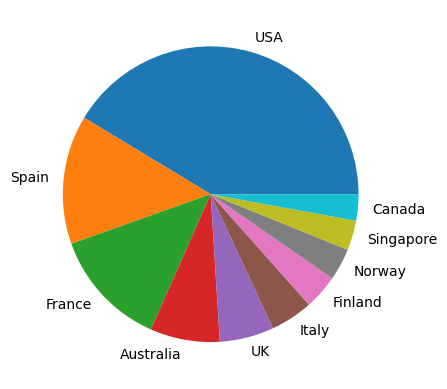

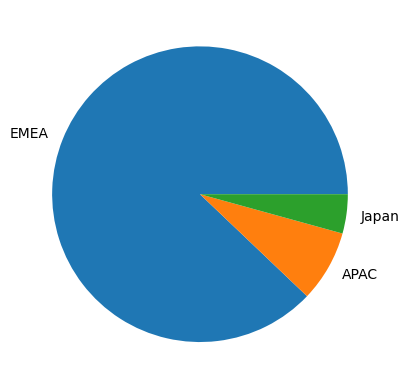

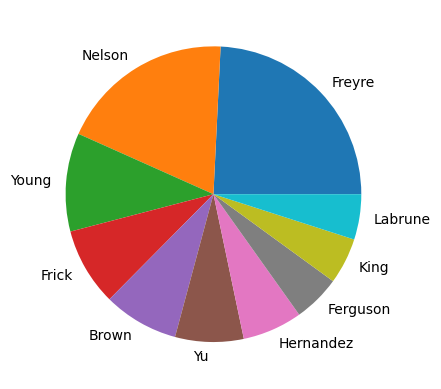

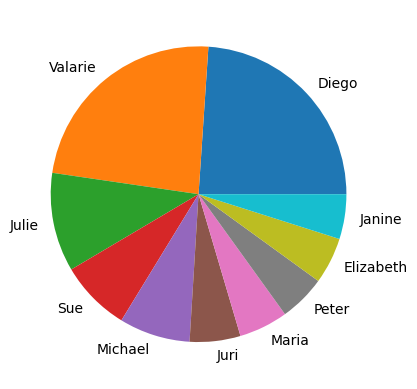

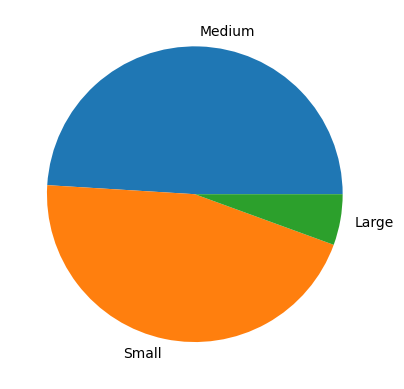

In [10]:
plt.figure(figsize = [15,8])
for col in categorical_cols:
    col_idx = data[col].value_counts().sort_values(ascending = False).head(10).index
    col_vals = data[col].value_counts().sort_values(ascending = False).head(10).values
    plt.pie(x = col_vals,labels = col_idx)
    plt.show();

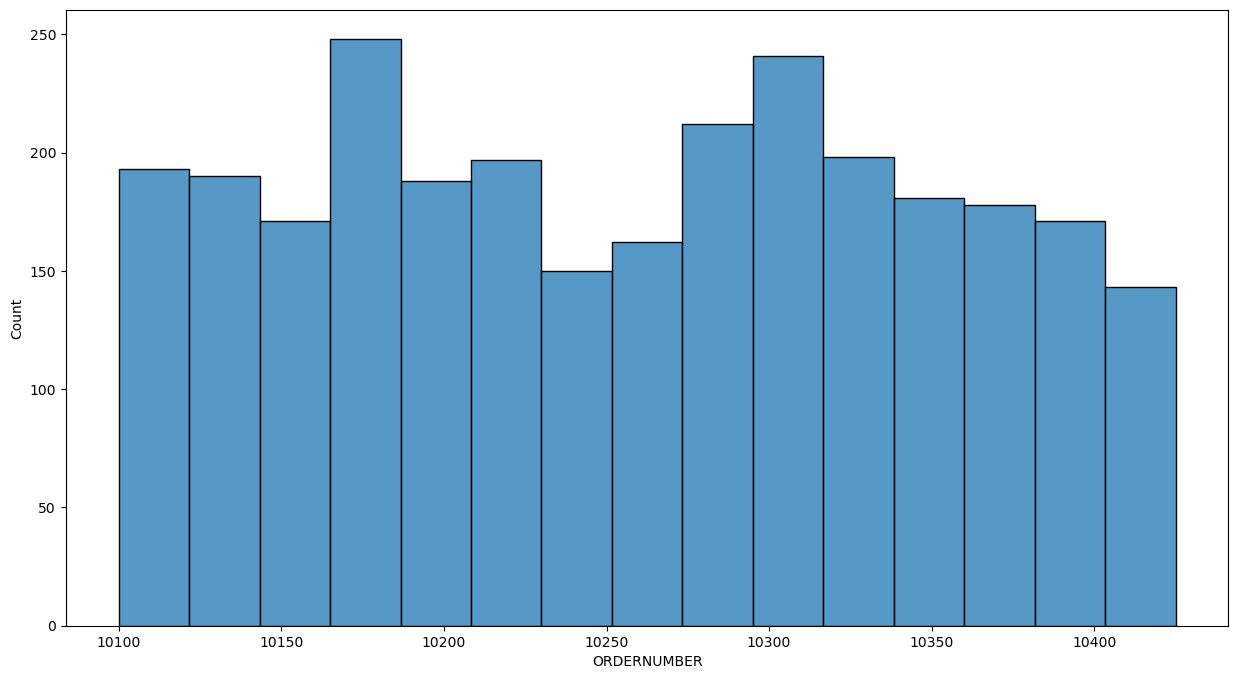

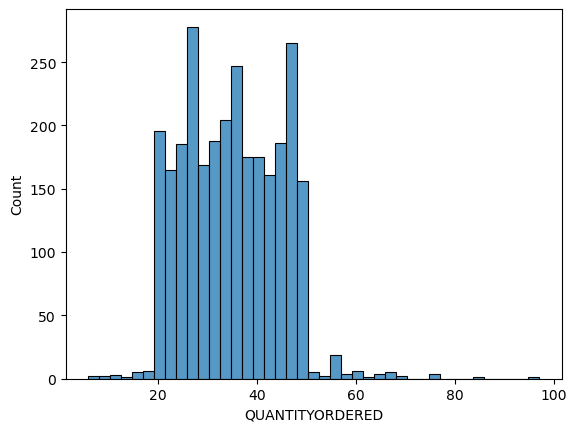

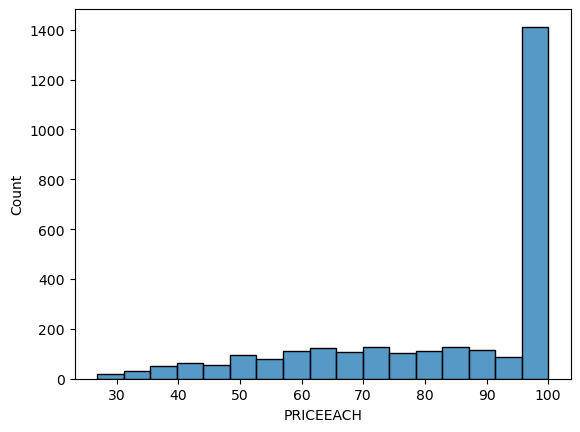

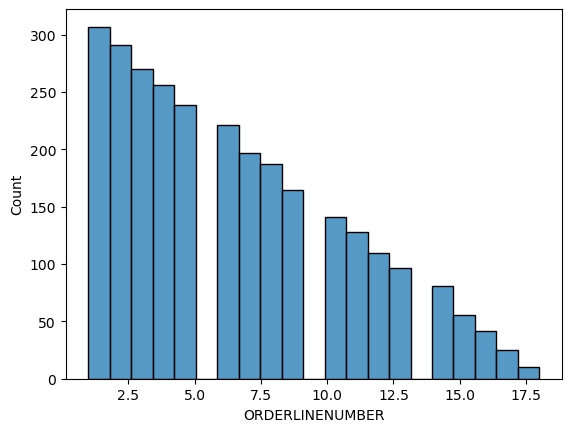

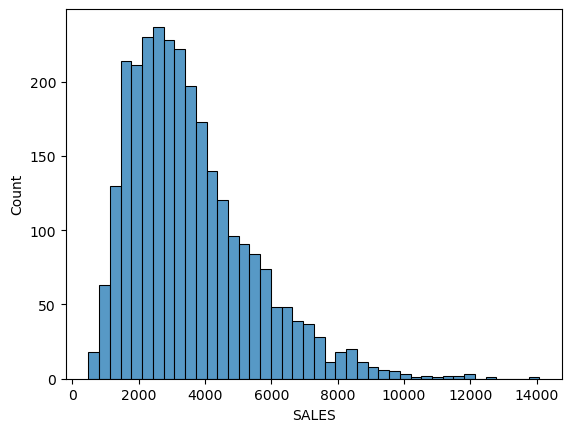

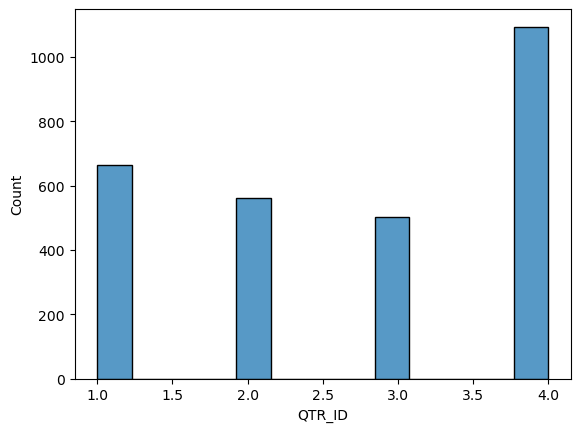

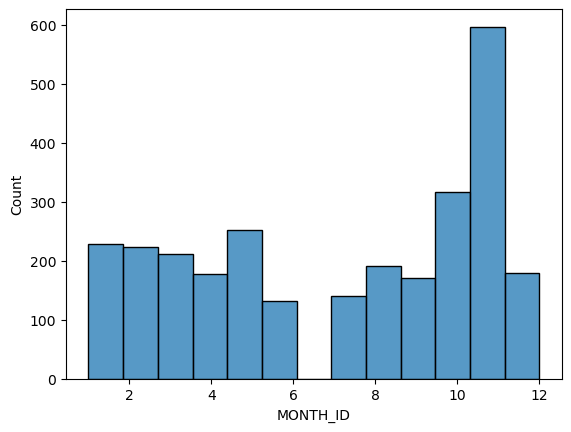

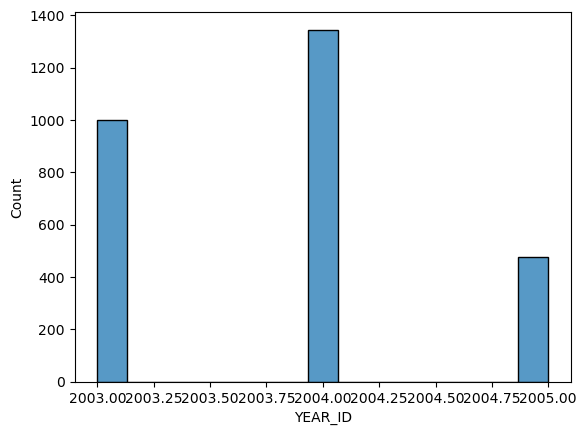

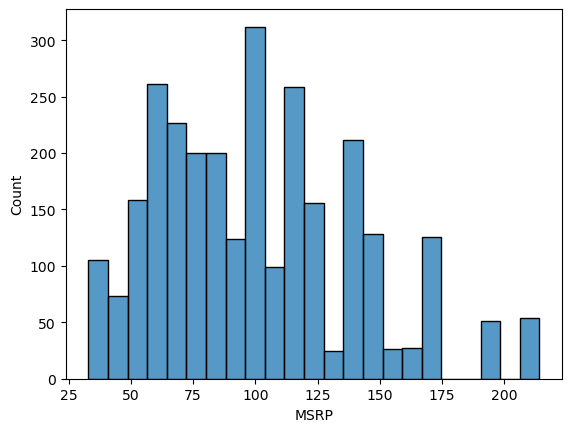

In [11]:
plt.figure(figsize=[15,8])
for col in numerical_cols:
    sns.histplot(data=data, x=col)
    plt.show();

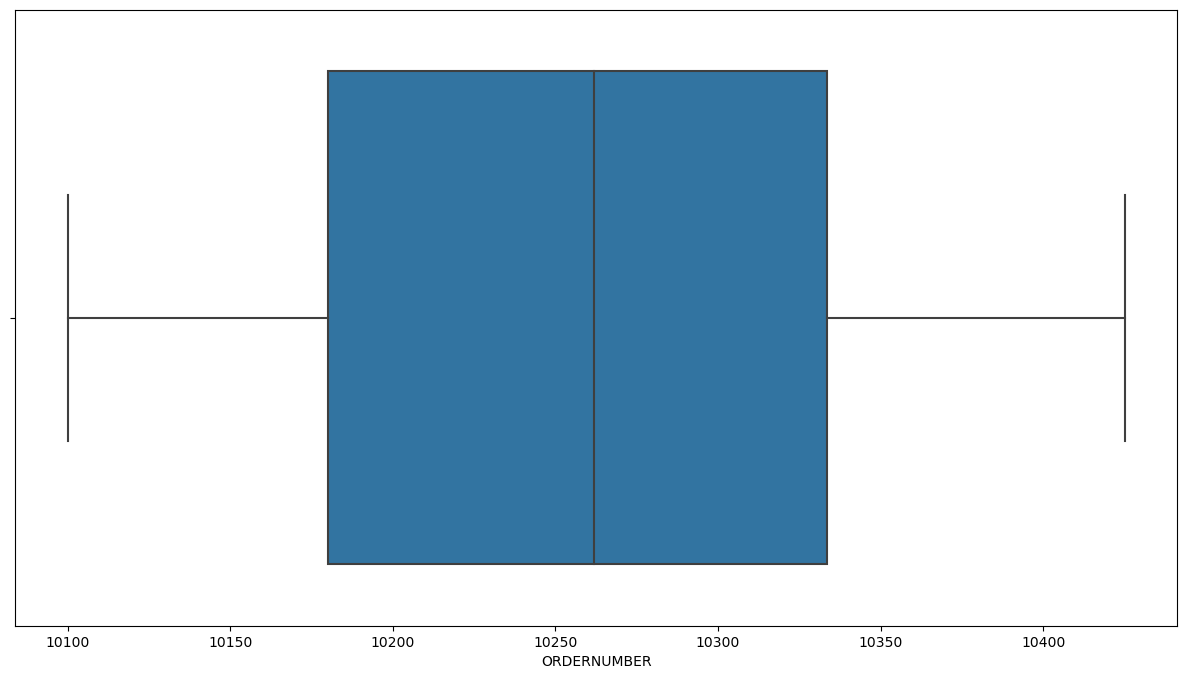

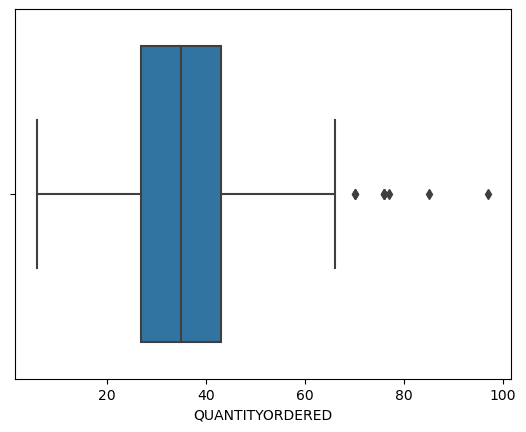

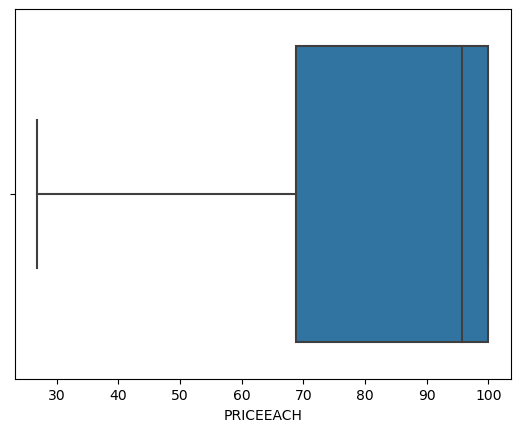

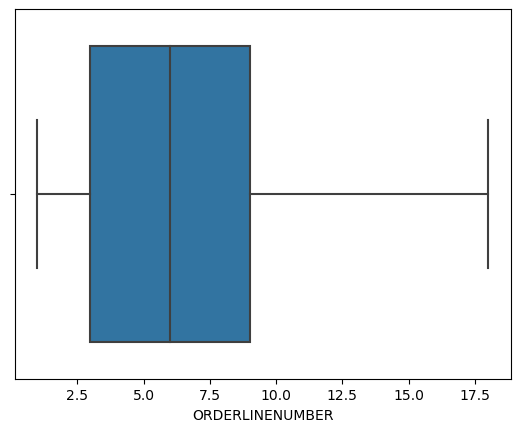

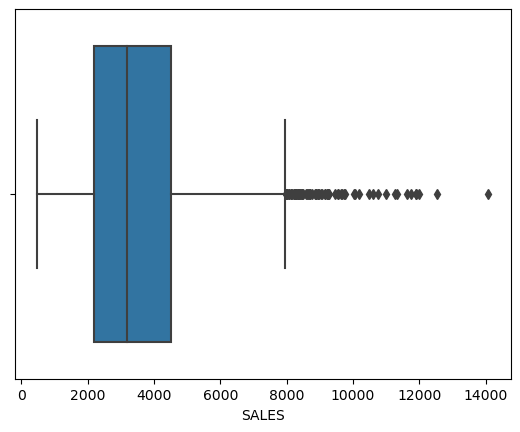

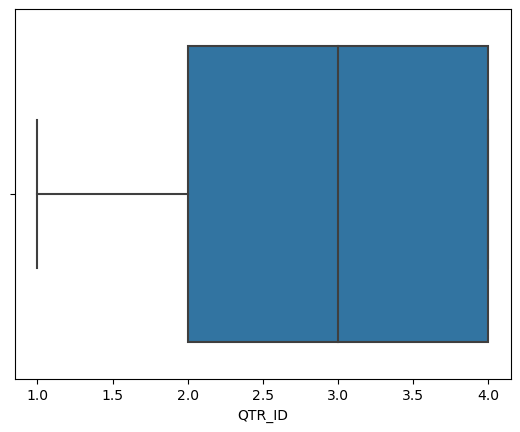

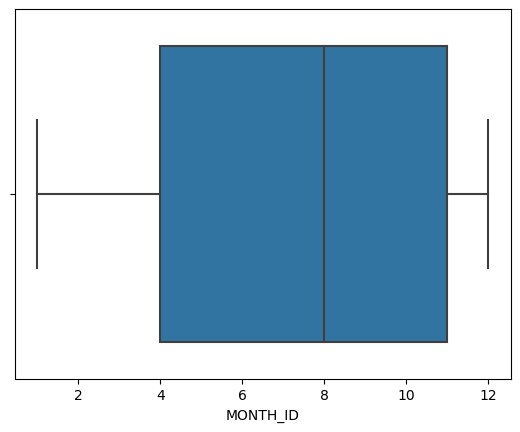

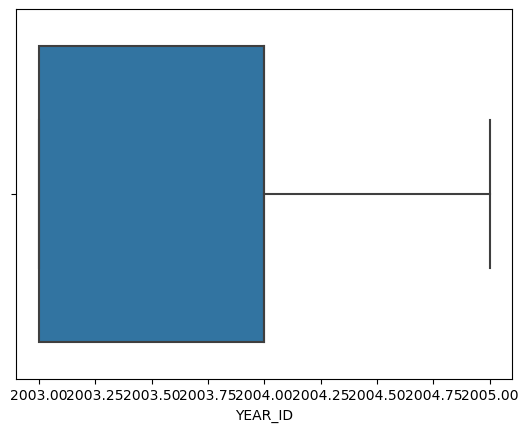

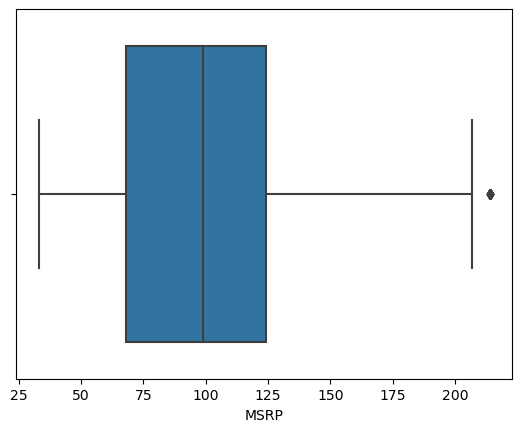

In [12]:
plt.figure(figsize=[15,8])
for col in numerical_cols:
    sns.boxplot(data=data, x = col)
    plt.show();

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X = data.drop(["SALES"], axis=1)
y = data["SALES"]

In [15]:
X

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,112,5,1,2,2003,1,...,57,3,42,9,0,18,1,76,36,2
1,10121,34,81.35,5,185,5,2,5,2003,1,...,40,3,56,1,27,6,1,28,54,2
2,10134,41,94.74,2,204,5,3,7,2003,1,...,21,3,52,1,41,6,1,17,11,1
3,10145,45,83.26,6,226,5,3,8,2003,1,...,54,3,53,1,49,18,1,75,31,1
4,10159,49,100.00,14,23,5,4,10,2003,1,...,51,3,59,1,14,18,1,8,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,88,5,4,12,2004,3,...,65,3,34,1,14,14,1,25,13,2
2819,10373,29,100.00,1,16,5,1,1,2005,3,...,87,3,51,1,50,5,1,39,56,1
2820,10386,43,100.00,4,119,4,1,3,2005,3,...,65,3,34,1,14,14,1,25,13,1
2821,10397,34,62.24,1,136,5,1,3,2005,3,...,0,3,68,1,16,6,1,59,5,2


In [16]:
y

0       2871.00
1       2765.90
2       3884.34
3       3746.70
4       5205.27
         ...   
2818    2244.40
2819    3978.51
2820    5417.57
2821    2116.16
2822    3079.44
Name: SALES, Length: 2823, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2117, 24), (706, 24), (2117,), (706,))

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Scaling train data
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.62573526, -1.32011976,  0.7470592 , ...,  0.40215389,
        -0.25551848,  1.00359444],
       [-0.15121345,  1.01081842, -1.16874409, ...,  0.40215389,
         0.12690119,  1.00359444],
       [ 1.36941324,  1.01081842,  0.4257785 , ..., -0.66453866,
        -1.11596274, -0.67726745],
       ...,
       [ 0.17232414, -1.32011976,  0.81784987, ...,  0.07750833,
        -0.54233323,  1.00359444],
       [ 0.08604745,  0.30140245,  0.18617932, ...,  1.6543582 ,
        -0.44672832, -0.67726745],
       [-1.04633413,  0.80812815, -2.3360475 , ..., -1.4529636 ,
        -0.25551848,  1.00359444]])

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
# Training model
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

<AxesSubplot:ylabel='SALES'>

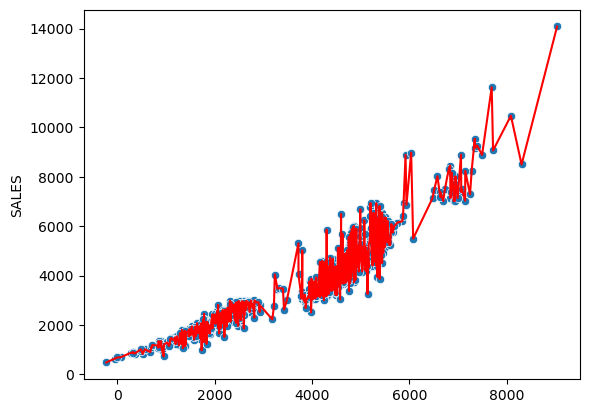

In [27]:
sns.scatterplot(x = y_pred, y = y_test)
sns.lineplot(x = y_pred, y = y_test, color = "red")

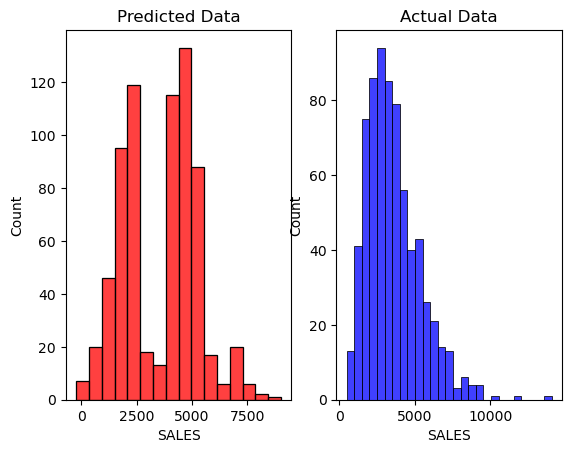

In [28]:
plt.subplot(1,2,1)
sns.histplot(y_pred, color = "red")
plt.title("Predicted Data")
plt.xlabel("SALES")
plt.subplot(1,2,2)
sns.histplot(y_test, color = "blue")
plt.xlabel("SALES")
plt.title("Actual Data")
plt.show();

C:\Users\Piyush S More\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Piyush S More\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


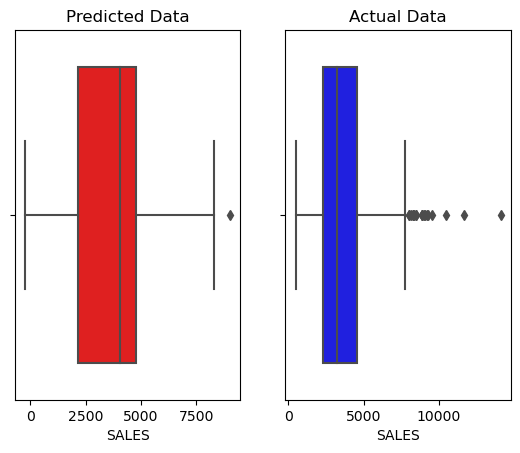

In [29]:
plt.subplot(1,2,1)
sns.boxplot(y_pred, color = "red")
plt.title("Predicted Data")
plt.xlabel("SALES")
plt.subplot(1,2,2)
sns.boxplot(y_test.values, color = "blue")
plt.xlabel("SALES")
plt.title("Actual Data")
plt.show();

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

In [32]:
print("Accuracy of model is: ", accuracy_score(y_test,y_pred))

ValueError: continuous is not supported

In [33]:
print("MSE is :",  mean_squared_error(y_test,y_pred))
print("MAE is :", mean_absolute_error(y_test,y_pred))
print("R2 Score is :", r2_score(y_test,y_pred))

MSE is : 468439.7135762525
MAE is : 506.71779284091724
R2 Score is : 0.8546749012400318
